# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [2]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt 
from scipy.stats import norm


#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset

In [3]:
# Load files into a pandas dataframe
df = pd.read_csv('data/Train.csv')
# test = pd.read_csv('Test.csv')
# ss = pd.read_csv('SampleSubmission.csv')
# variables = pd.read_csv('VariableDefinitions.csv')

In [4]:
# Let’s observe the shape of our datasets.
# print('train data shape :', train.shape)
# print('test data shape :', test.shape)

df.shape

(23524, 13)

The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [5]:
# inspect train data
display(df.head())
display(df.describe())

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [6]:
# Check for missing values
print('missing values:',df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


We don't have missing data in our dataset.



### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [7]:
 #show some information about the dataset
print(df.info())
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

Total number of records: 23524
Individuals with bank account: 3312
Percentage of individuals with bank account: 14.08%
Percentage of female individuals: 58.99%


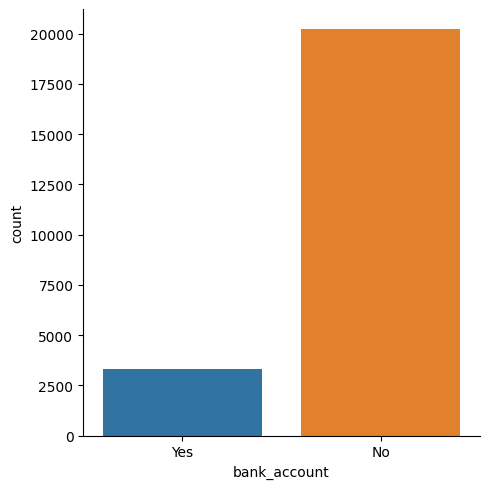

In [21]:
# Explore Target distribution 
display(sns.catplot(x="bank_account", kind="count", data=df))
# TODO: Total number of records
n_records = len(df)

# TODO: Number of records where individual have bank account
n_yes = len(df[df['bank_account'] == 'Yes'])

# TODO: Percentage of individuals whose have bank account 
yes_percent = n_yes / n_records * 100

# TODO: Percentage of female 
w_percent = len(df[df['gender_of_respondent'] == 'Female']) / n_records * 100

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals with bank account: {}".format(n_yes))
print ("Percentage of individuals with bank account: {:.2f}%".format(yes_percent))
print ("Percentage of female individuals: {:.2f}%".format(w_percent))


#########?????
# print ("Percentage of female individuals with bank account: {:.2f}%".format(0))


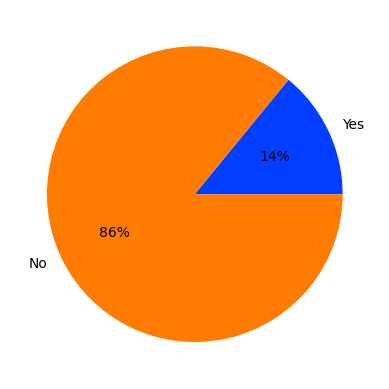

In [24]:
#define data
data = [yes_percent, 100-yes_percent]
labels = ['Yes', 'No']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
# plt.title('Bank Access')
plt.show()

The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

If you want to learn how to handle missing data in your dataset, we recommend you read How to [Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

We won’t go further on understanding the dataset because Davis has already published an article about exploratory data analysis (EDA) with the financial Inclusion in Africa dataset. You can read and download the notebook for EDA in the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

In [9]:
# Let's view the variables
variables = pd.read_csv('data/VariableDefinitions.csv')
variables
RSEED = 42

# EDA

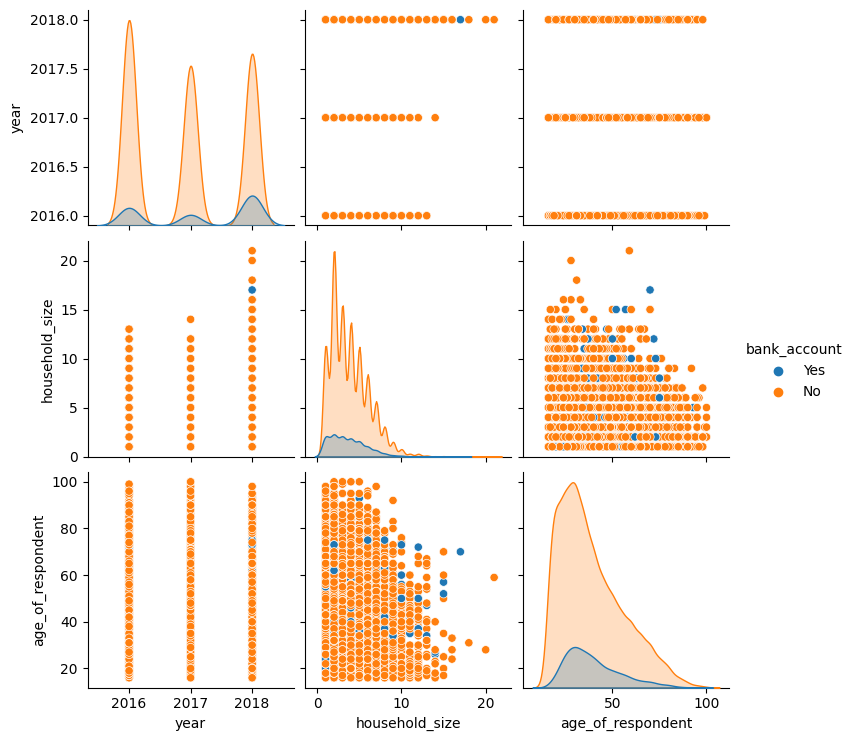

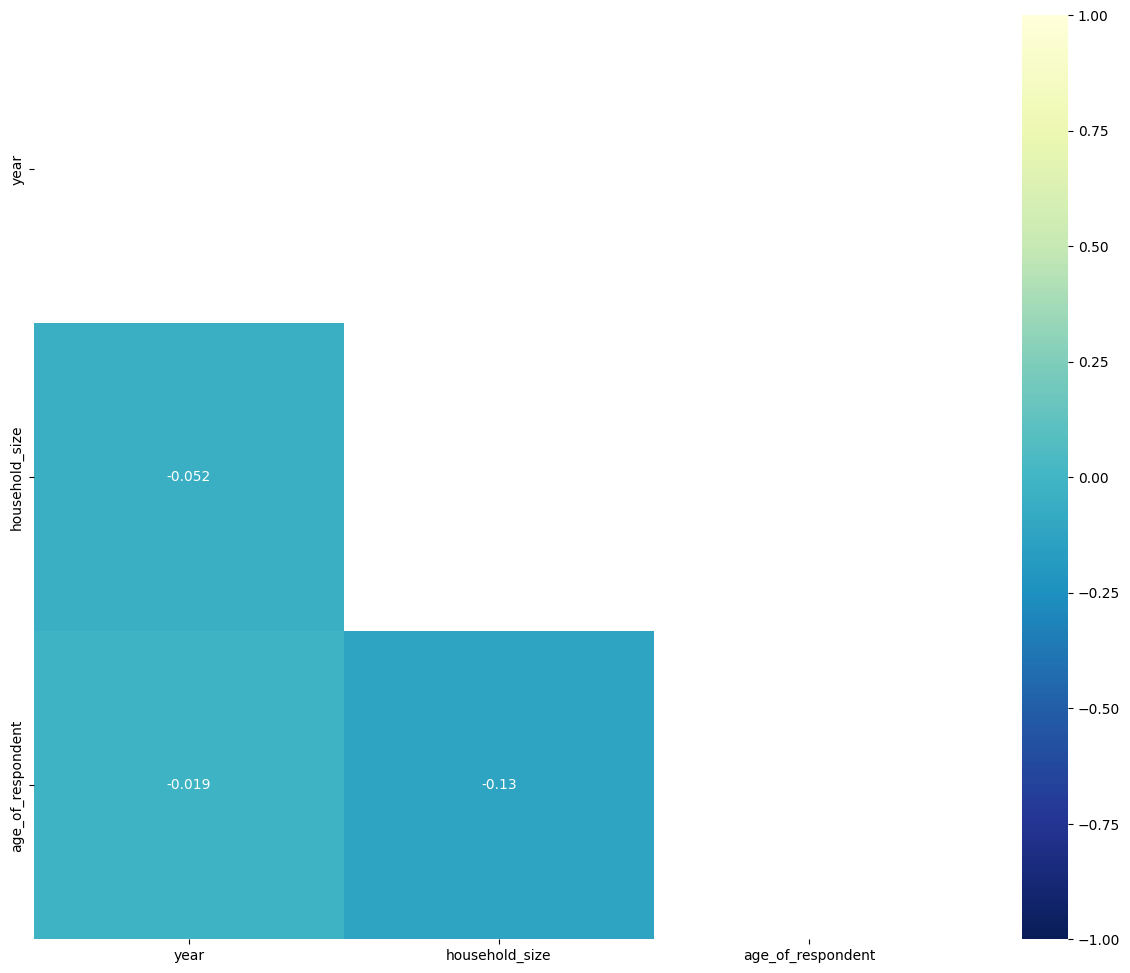

In [10]:
# # Pairplot
display(sns.pairplot(df, hue='bank_account'))

#Heatmap
corr = df.corr()

plt.subplots(figsize=(15, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="YlGnBu_r", mask=mask, vmax=1, vmin=-1);


In [11]:
# display(sns.pairplot(mdf[mdf['country'] == 'Rwanda'], hue='bank_account'))
# mdf
# #

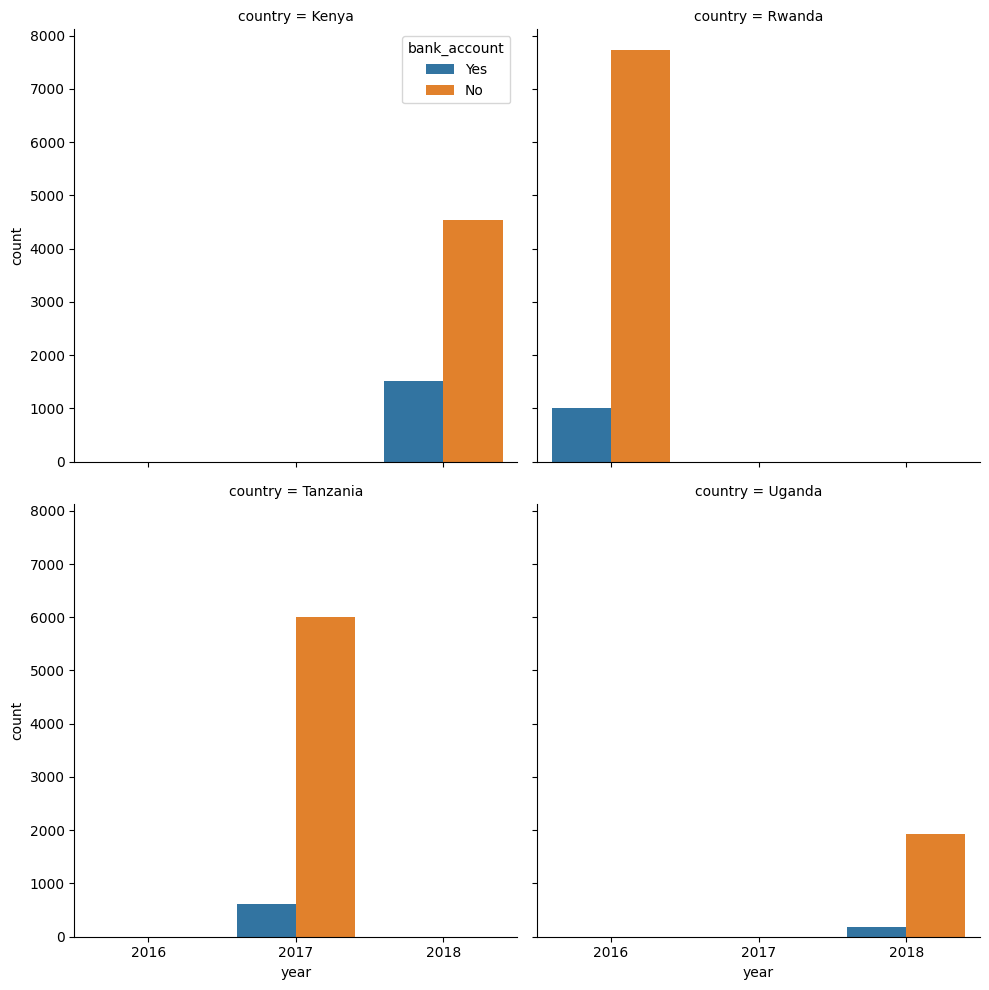

In [13]:
#SNS plot
sns.catplot(x="year", col='country', data=df, hue='bank_account', kind='count', legend_out=False, col_wrap=2) # col_wrap=4
# WE have only one year of census for each of the four countries


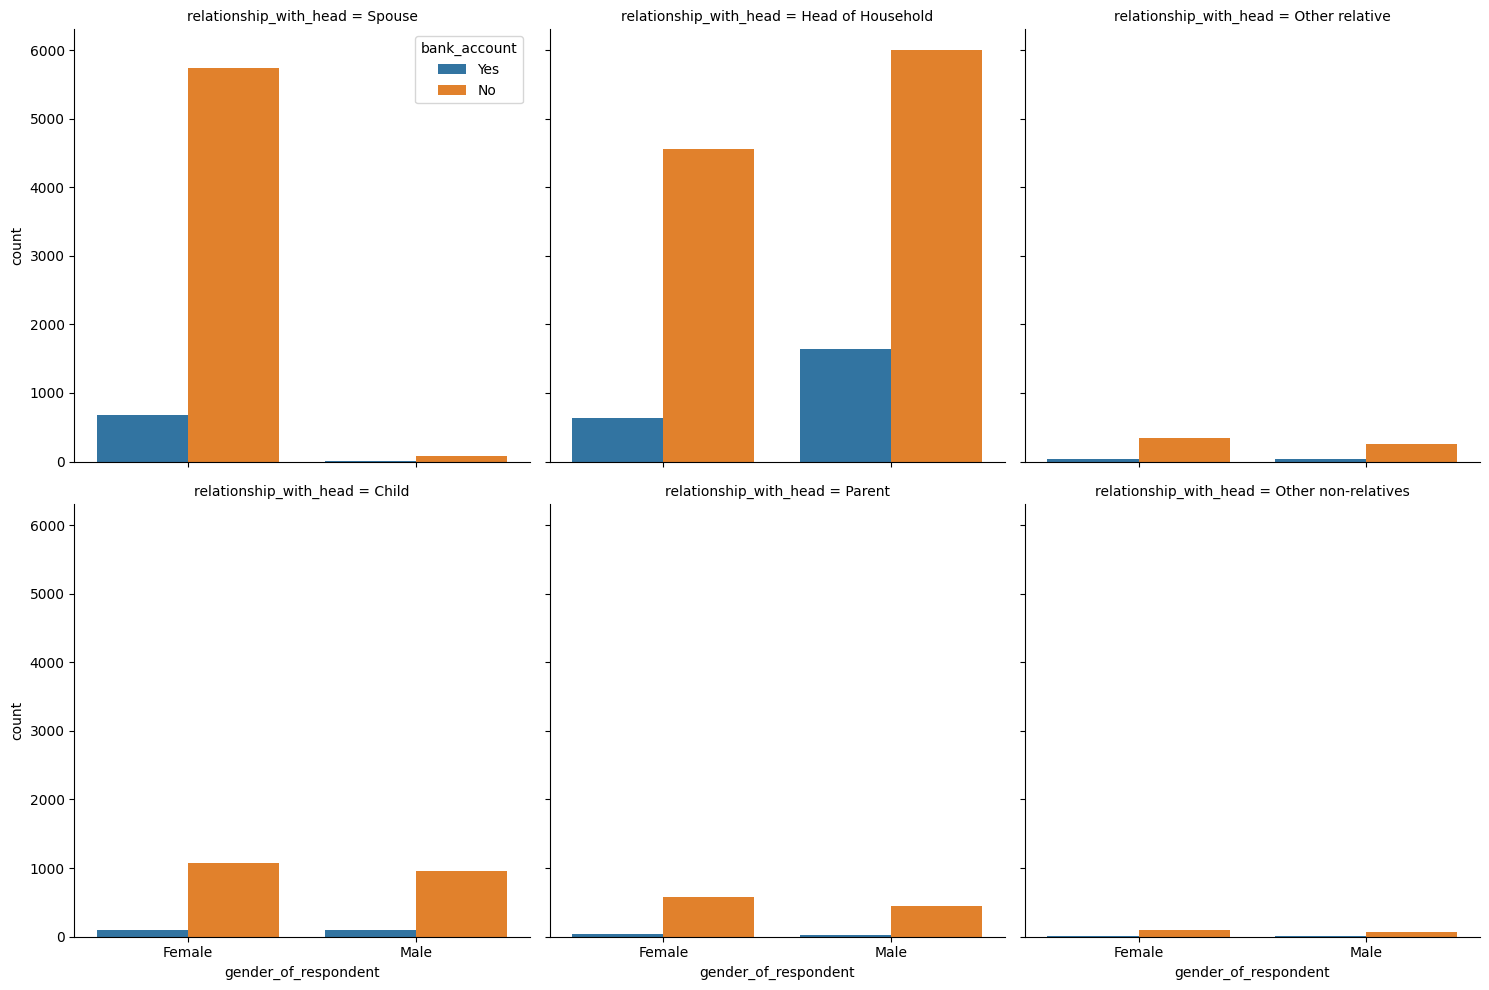

In [15]:
sns.catplot(x="gender_of_respondent", col='relationship_with_head', data=df, hue='bank_account', legend_out=False, kind='count', col_wrap=3)

#Mainly individuals were the Head of the Household or the spouse of it. 
# The majority of men are mainly the head of household
# the majority of women were the spouse or the head of the household


In [270]:
# ### next point: See if the case of women of household are divorcee 

# g = sns.catplot(x="marital_status", col='relationship_with_head', data=df, hue='gender_of_respondent', kind='count', col_wrap=1)
# g.set_xticklabels(rotation=30)


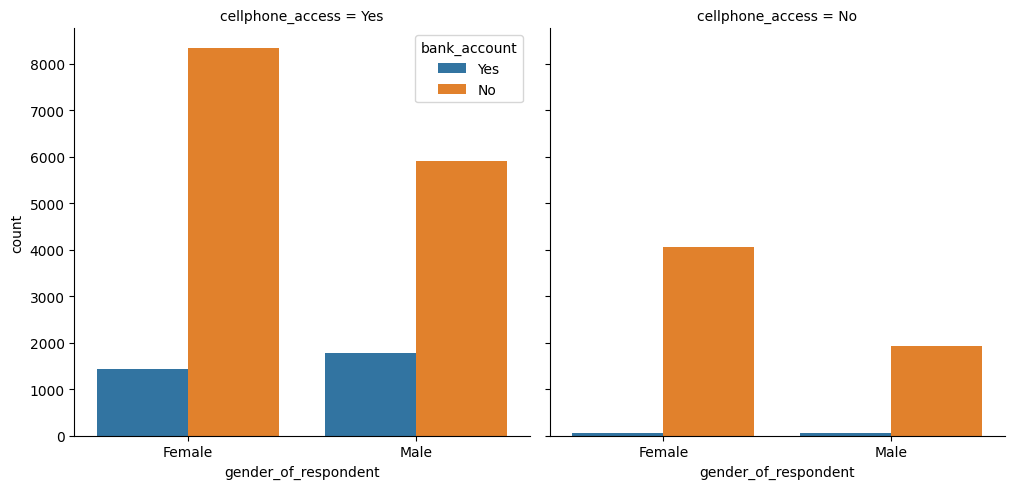

In [16]:
sns.catplot(x="gender_of_respondent", col='cellphone_access', data=df, hue='bank_account', legend_out=False, kind='count', col_wrap=3)
# the majority of people with cellphone access have a bank account but not the other way around.

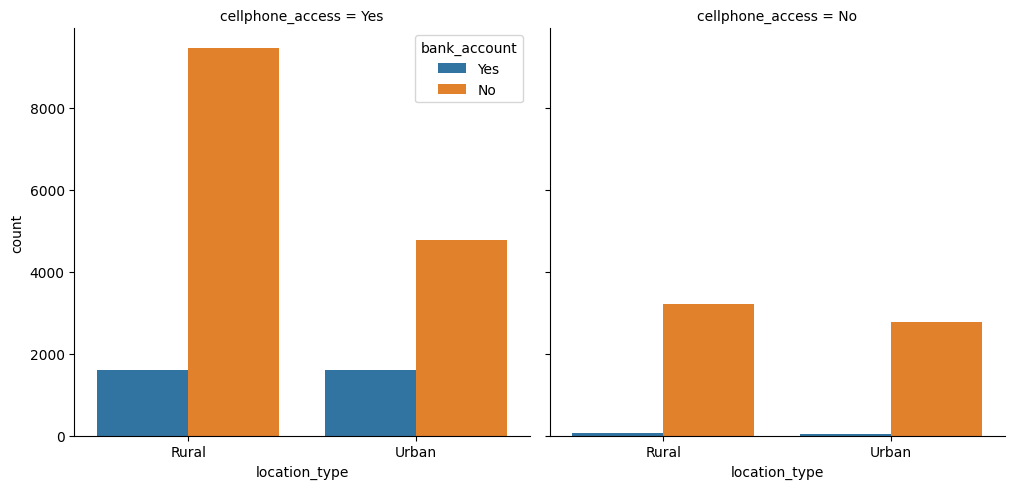

In [17]:
sns.catplot(x="location_type", col='cellphone_access', data=df, hue='bank_account', kind='count',legend_out=False, col_wrap=3)
# the majority of people with cellphone access have a bank account but not the other way around.

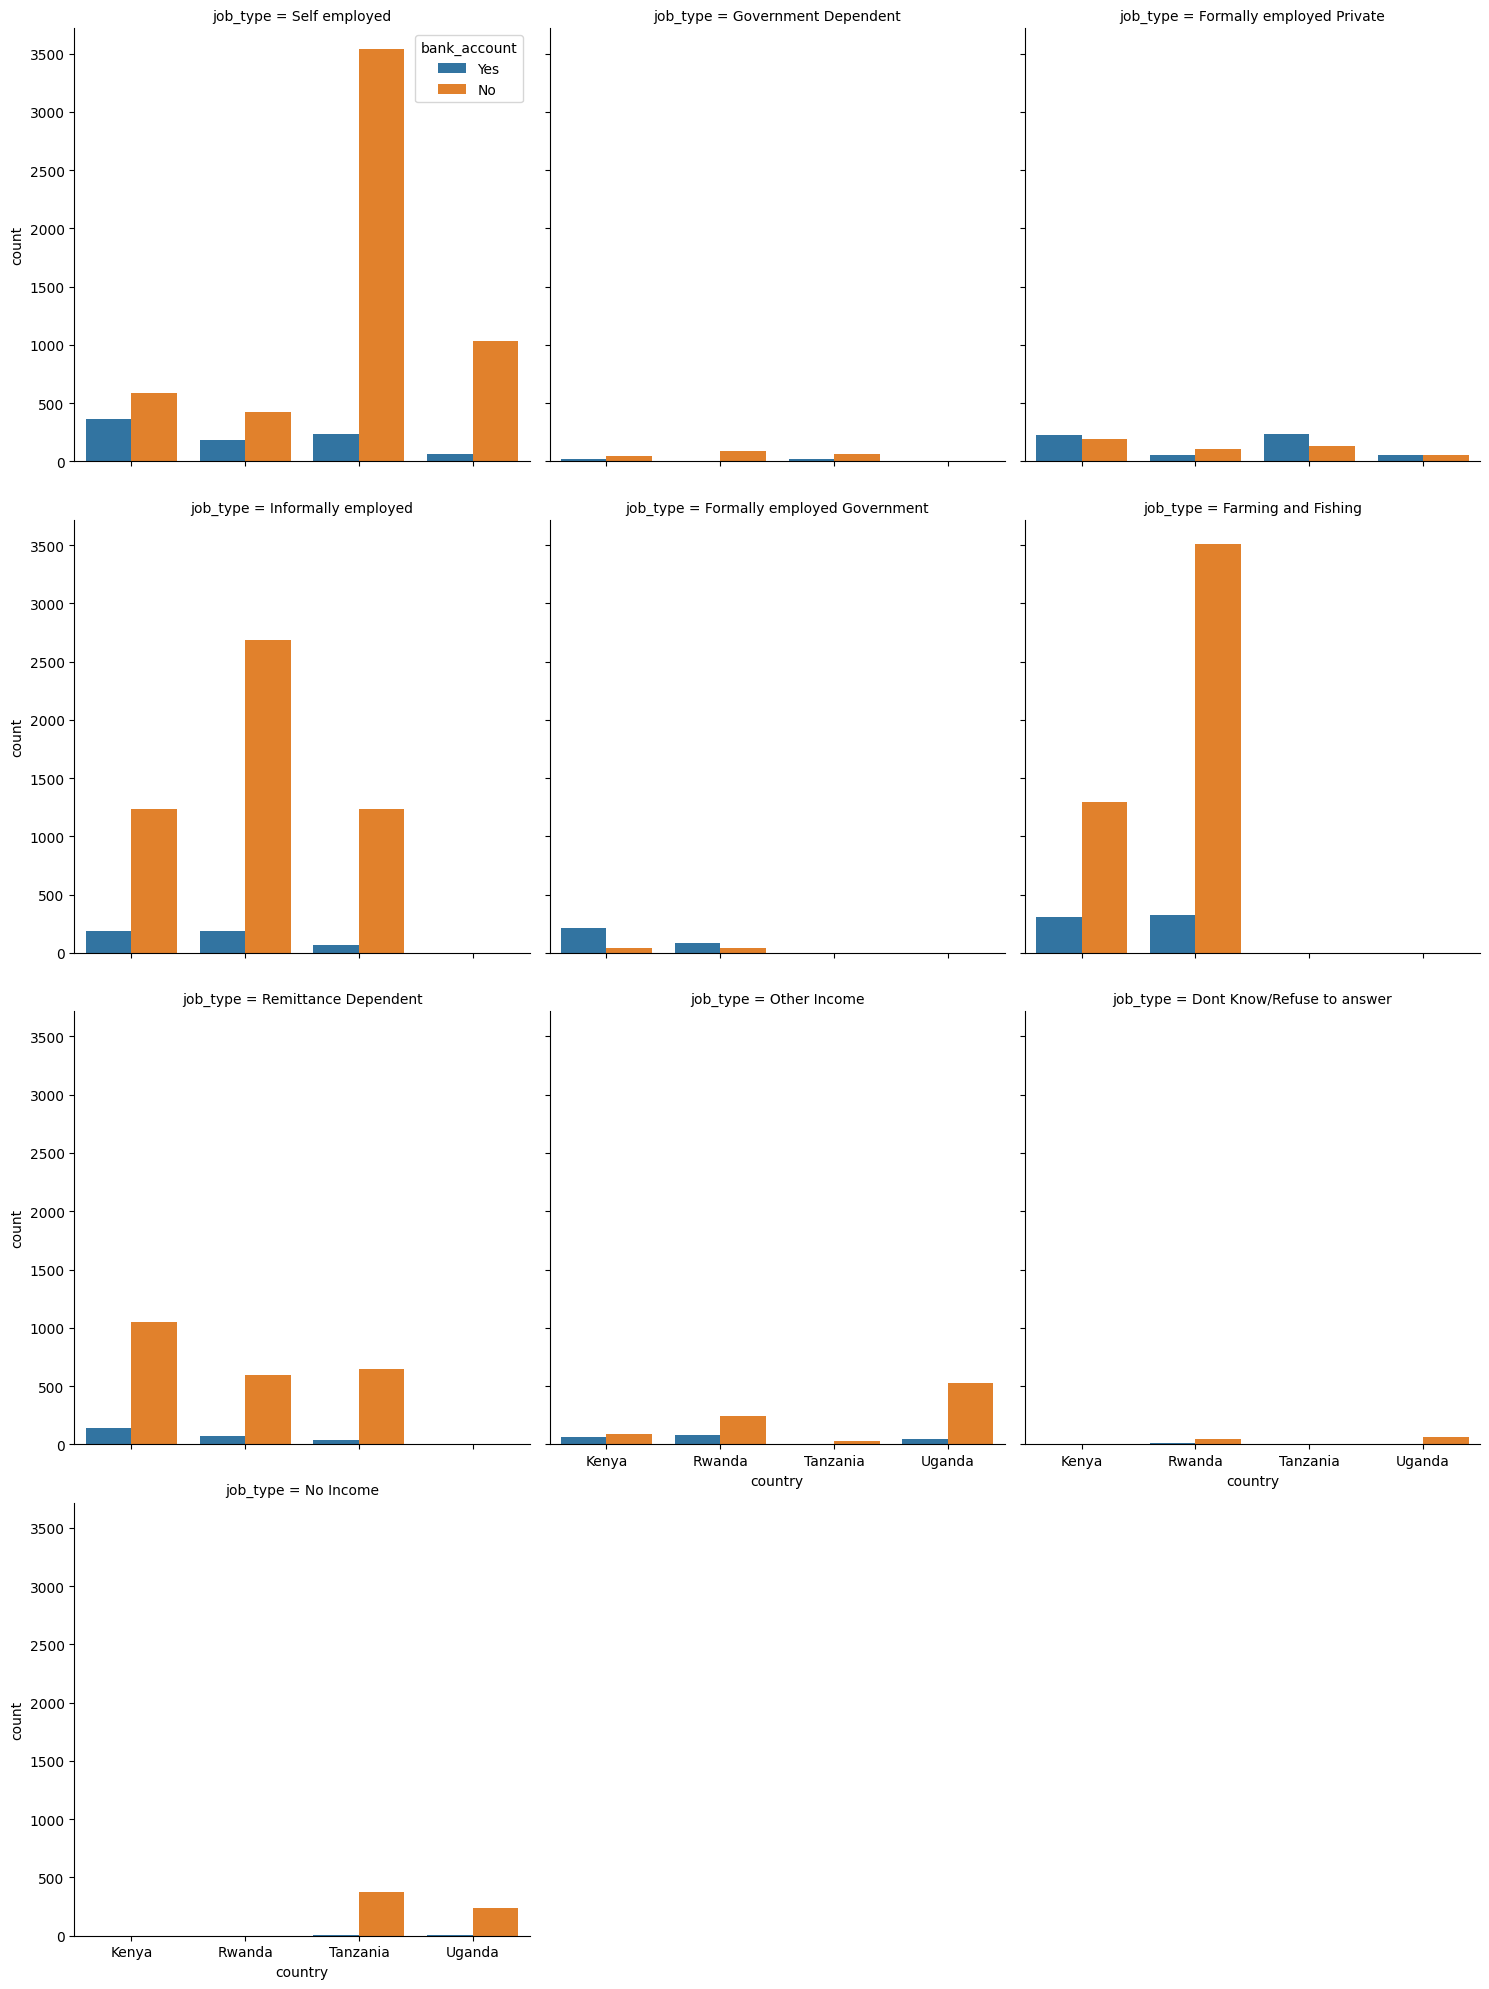

In [18]:
sns.catplot(x="country", col='job_type', data=df, hue='bank_account', kind='count', legend_out=False, col_wrap=3)


when women are the spouse of the head of household they are married/living together or single/never married.

when women are the head of household, they are in first place: widowed, followed by married/living together, and then single/never married. 


In [273]:
# Plot in circle

a = df.groupby('gender_of_respondent')
a

In [274]:
# ????????????? confusion matrix here for each country

### 3. Data preparation for machine learning
Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

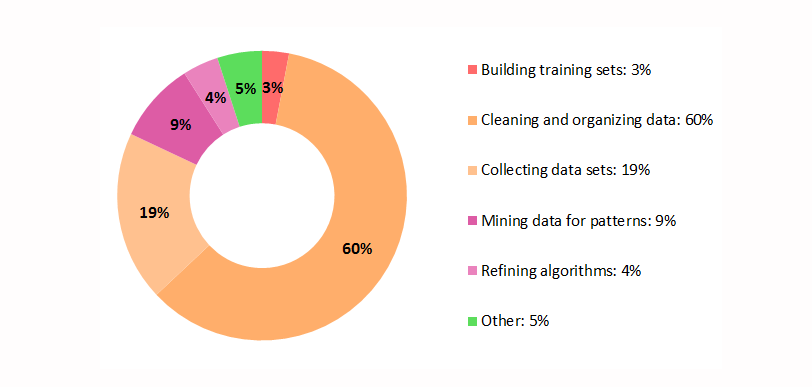

The first step is to separate the independent variables and target(bank_account) from the train data. Then transform the target values from the object data type into numerical by using [LabelEncoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).


3.1. Data Cleaning


drop country, year, uniqueid

change to encoder: gender, bank_account, location_type, cell_phone,

get dummies: relationship_with_head , marital_status, educational_levek, 
job_type

to scale: age_of _respondent, household_size

In [275]:
dff = df.copy()

dff = dff.drop(['year','country', 'uniqueid'], axis =1)

In [276]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                    n_informative=2, n_redundant=0,
                    random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


## Baseline Model 

In [277]:
bX = pd.DataFrame(dff['cellphone_access']) 
by = pd.DataFrame(dff['bank_account'])

In [278]:

bX = bX.replace('Yes', 0) 
bX = bX.replace('No', 1) 
bX = bX.replace('Rural', 0) 
bX = bX.replace('Urban', 1) 
bX = bX.values.astype(float)

by = by.replace('No',0)
by = by.replace('Yes', 1)
by = by.values.astype(float)

In [279]:
print(classification_report(by, bX))
print(f"F1-score is 0.26 for the hypothesis that is a person leaves in Urban area it has a bank account.")

              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76     20212
         1.0       0.02      0.03      0.02      3312

    accuracy                           0.61     23524
   macro avg       0.42      0.37      0.39     23524
weighted avg       0.70      0.61      0.65     23524

F1-score is 0.26 for the hypothesis that is a person leaves in Urban area it has a bank account.


### Before We scan first with 3 models, we prepare the data

In [280]:
X = pd.DataFrame(dff.drop('bank_account', axis=1))
y = pd.DataFrame(dff['bank_account'])

In [281]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent"]].values.astype(float)

    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type"]

    # Label Encoder conversion
    # data["location_type"] = le.fit_transform(data["location_type"])
    # data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    # data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop un

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)


    return data

In [282]:
X = preprocessing_data(pd.DataFrame(X))

In [283]:
y = y.replace('Yes', '1') 
y = y.replace('No', '0') 
y = y.values.astype(float)

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                  test_size = 0.25, random_state=RSEED)

In [285]:
# Label Encoder conversion
list_enc = ["location_type","cellphone_access","gender_of_respondent"]
le = LabelEncoder()

for ty in list_enc:
    X_train[ty] = le.fit_transform(X_train[ty])
    X_test[ty] = le.transform(X_test[ty])

In [286]:
# scale our data into range of 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Correlation Heatmap of the preprocessed Data

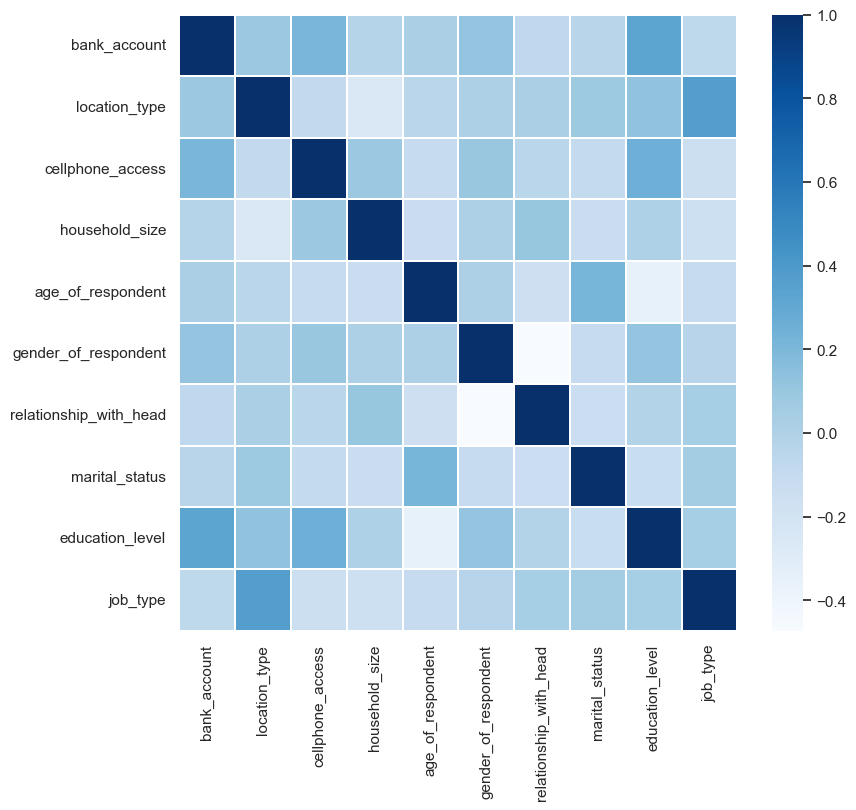

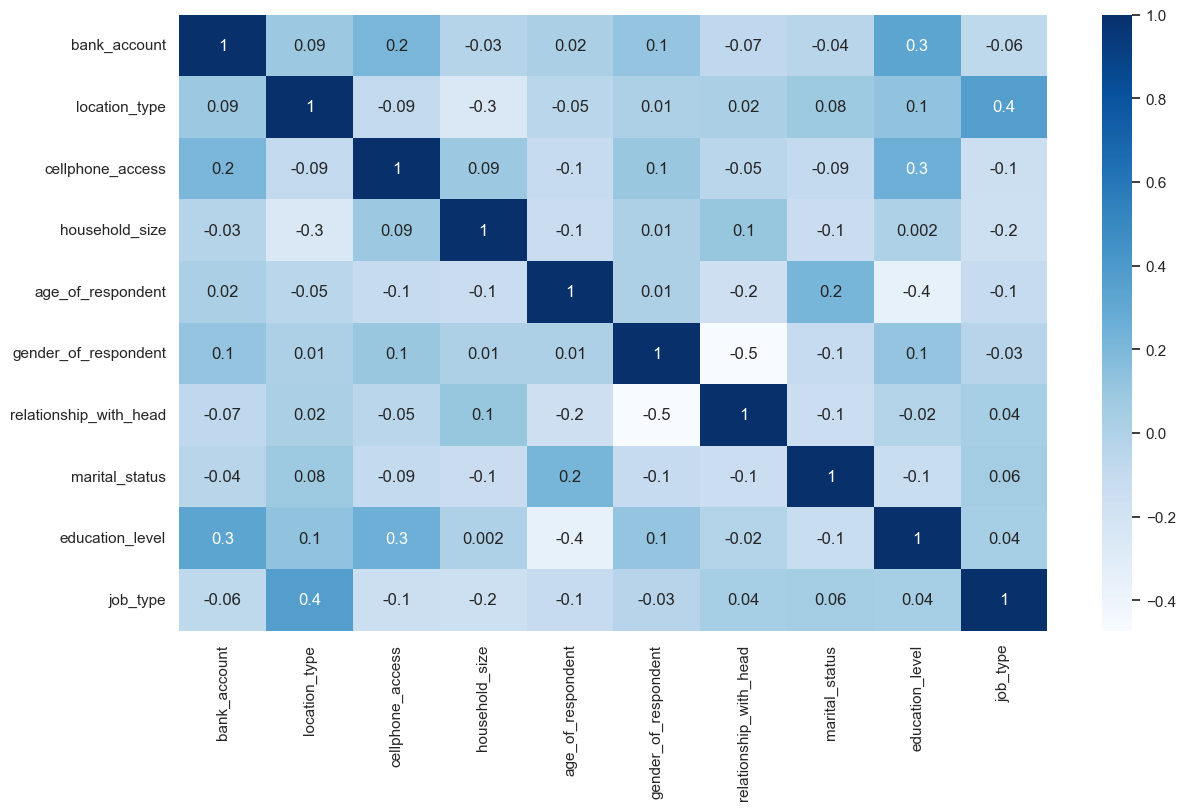

In [287]:
#Heatmap
train_data_corr=dff.apply(LabelEncoder().fit_transform)
train_data_corr

corrmat = train_data_corr.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="Blues", linewidths = 0.1)


plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corrmat = train_data_corr.corr()
heatmap = sns.heatmap(corrmat, annot=True, cmap="Blues", fmt='.1g')


Prepare data for minimal modelling

In [288]:
# KNN Baseline Model
knn = KNeighborsClassifier()

In [289]:
knn.fit(X_train, y_train)
b_pred = knn.predict(X_test)
b_pred

# target_names='bank_account'
print(classification_report(y_test, b_pred, digits=4))
print("f1-score: ", f1_score(y_test, b_pred))
print("Accuracy: ",  accuracy_score(y_test, b_pred))

              precision    recall  f1-score   support

         0.0     0.9049    0.9561    0.9298      5053
         1.0     0.5904    0.3865    0.4672       828

    accuracy                         0.8759      5881
   macro avg     0.7476    0.6713    0.6985      5881
weighted avg     0.8606    0.8759    0.8646      5881

f1-score:  0.4671532846715329
Accuracy:  0.8758714504335997


In [290]:
# Baseline Random Forest
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state=RSEED)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

b_y_pred=clf.predict(X_test)

print(classification_report(y_test, b_y_pred,digits=4))
print("f1-score: ", f1_score(y_test, b_y_pred))
print("Accuracy: ",  accuracy_score(y_test, b_y_pred))

              precision    recall  f1-score   support

         0.0     0.9067    0.9390    0.9226      5053
         1.0     0.5247    0.4106    0.4607       828

    accuracy                         0.8646      5881
   macro avg     0.7157    0.6748    0.6917      5881
weighted avg     0.8530    0.8646    0.8576      5881

f1-score:  0.46070460704607047
Accuracy:  0.8646488692399252


In [291]:
clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [292]:
# create baseline model
b_xg_model = XGBClassifier(random_state=RSEED)

# fit the model
b_xg_model.fit(X_train, y_train)

b_xg_y_pred = b_xg_model.predict(X_test)

print("f1-score: ", f1_score(y_test, b_xg_y_pred))
print("Accuracy: ",  accuracy_score(y_test, b_xg_y_pred))
print(classification_report(y_test, b_xg_y_pred, digits=4))

f1-score:  0.4728682170542635
Accuracy:  0.8843734058833532
              precision    recall  f1-score   support

         0.0     0.9035    0.9689    0.9351      5053
         1.0     0.6602    0.3684    0.4729       828

    accuracy                         0.8844      5881
   macro avg     0.7818    0.6686    0.7040      5881
weighted avg     0.8692    0.8844    0.8700      5881



## Preprocessing of data and Model development

In [293]:

# xg_model = XGBClassifier(random_state=RSEED)
# xg_model.fit(X_train, y_train) .  erase

In [294]:
b_xg_model.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [300]:
# RANDOMIZED SEARCH CV

param_grid = {'min_child_weight': [1,5,8],
        'gamma': [0.9, 1, 1.1],
        'subsample': [0.8, 1.0],
        'max_depth': [5, 6, 7],

        }

xg_model = XGBClassifier(random_state=RSEED)

# Instantiate random search and define the metric to optimize 
rs = RandomizedSearchCV(xg_model, param_grid, scoring='f1',
                  cv=5, verbose=1, n_jobs=-1, random_state=RSEED)

# Fit randomized search object to data
# start = timer()
rs.fit(X_train, y_train)
# end = timer()
# rgs_time = end-start

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
               

In [303]:
# Best score
print('Best score:', round(rs.best_score_, 3))

# Best parameters
print('Best parameters:', rs.best_params_)



Best score: 0.456
Best parameters: {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 6, 'gamma': 1.1}


In [ ]:
Best score: 0.456
Best parameters: {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 6, 'gamma': 1.1}

## GRIDSEARCH

In [307]:
## GRIDSEARCHCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weight': [5,8],
        'gamma': [1, 2, 2.5],
        'subsample': [0.8, 1],
        'max_depth': [4, 5, 6]
        }

       
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=1,cv=5, scoring="f1")
my_xgb_model.fit(X_train, y_train)
print(my_xgb_model.best_params_)        




Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 2, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.8}


In [306]:
# 1st BEST grid search
 #'gamma': 2, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.8}
# Assigning the fitted SGDClassifier model with best parameter combination to a new variable sgd_best
xboost_best = my_xgb_model.best_estimator_

# Making predictions on the test set
y_pred_test = xboost_best.predict(X_test)
# Let us print out the performance of our model on the test set.
print(classification_report(y_test, y_pred_test))
print(my_xgb_model.best_params_)

#Metrics
print("f1-score: ", f1_score(y_test, y_pred_test))
print("Accuracy: ",  accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits=4))
confusion_matrix(y_test, y_pred_test)

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      5053
         1.0       0.67      0.36      0.47       828

    accuracy                           0.89      5881
   macro avg       0.79      0.66      0.70      5881
weighted avg       0.87      0.89      0.87      5881

{'gamma': 2, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.8}
f1-score:  0.46603475513428116
Accuracy:  0.8850535623193334
              precision    recall  f1-score   support

         0.0     0.9021    0.9717    0.9356      5053
         1.0     0.6735    0.3563    0.4660       828

    accuracy                         0.8851      5881
   macro avg     0.7878    0.6640    0.7008      5881
weighted avg     0.8699    0.8851    0.8695      5881



array([[4910,  143],
       [ 533,  295]])

In [309]:
#2 
#min_child_weight=1, gamma=1, subsample=0.8, max_depth=5

## FINAL Xboost model
# fit by setting best parameters and Evaluate model
f_xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

f_xgb_model.fit(X_train, y_train)
y_pred = f_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=5))

#Metrics
print("f1-score: ", f1_score(y_test, y_pred))
print("Accuracy: ",  accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0    0.90349   0.96893   0.93506      5053
         1.0    0.66017   0.36836   0.47287       828

    accuracy                        0.88437      5881
   macro avg    0.78183   0.66864   0.70397      5881
weighted avg    0.86923   0.88437   0.86999      5881

f1-score:  0.4728682170542635
Accuracy:  0.8843734058833532
              precision    recall  f1-score   support

         0.0     0.9035    0.9689    0.9351      5053
         1.0     0.6602    0.3684    0.4729       828

    accuracy                         0.8844      5881
   macro avg     0.7818    0.6686    0.7040      5881
weighted avg     0.8692    0.8844    0.8700      5881



array([[4896,  157],
       [ 523,  305]])

In [316]:
#2 .  FINAL MODEL
# min_child_weight=1, gamma=1, subsample=0.6, max_depth=6

## FINAL Xboost model
# fit by setting best parameters and Evaluate model
f_xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.6, max_depth=6)

f_xgb_model.fit(X_train, y_train)
y_pred = f_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=5))

#Metrics
print("f1-score: ", f1_score(y_test, y_pred))
print("Accuracy: ",  accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0    0.90539   0.96398   0.93377      5053
         1.0    0.63673   0.38527   0.48006       828

    accuracy                        0.88250      5881
   macro avg    0.77106   0.67462   0.70691      5881
weighted avg    0.86756   0.88250   0.86989      5881

f1-score:  0.48006019563581637
Accuracy:  0.8825029756844074
              precision    recall  f1-score   support

         0.0     0.9054    0.9640    0.9338      5053
         1.0     0.6367    0.3853    0.4801       828

    accuracy                         0.8825      5881
   macro avg     0.7711    0.6746    0.7069      5881
weighted avg     0.8676    0.8825    0.8699      5881



array([[4871,  182],
       [ 509,  319]])

In [317]:
# SAVE MODEL

# {'gamma': 2, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.8}
# save to JSON
f_xgb_model.save_model("final_xgboost.json")
# save to text format
f_xgb_model.save_model("final_xgboost.txt")

